## draw image

In [54]:
from matplotlib import pyplot as plt
import numpy as np

def draw_img(img):
    fig = plt.figure(figsize=(5, 5))
    gs = fig.add_gridspec(1, 1)

    ax = fig.add_subplot(gs[0, 0])
    ax.set_title(f"image")
    ax.imshow(img, cmap="gray")

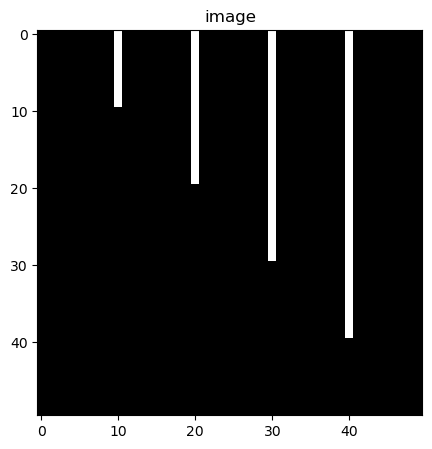

In [55]:
img = np.zeros((50, 50))

img[0:10, 10] = 255
img[0:20, 20] = 255
img[0:30, 30] = 255
img[0:40, 40] = 255
draw_img(img)

## draw step

In [56]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

def rotate(img, angle):
    rows, cols = img.shape
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    dst = cv2.warpAffine(img, M, (cols, rows))
    return dst

def projection(image, vert=False):
    axis = 1
    if vert:
        axis = 0

    # Compute the sums of the rows - the projection
    row_sums = np.sum(image, axis=axis)

    return row_sums

def draw_step(img):
    # define the degrees in each row
    degs = [0, 30, 55, 90, 105, 140, 170]

    row_count = len(degs)
    col_count = 4

    fig = plt.figure(figsize=(col_count * 5, row_count * 5))
    fig.suptitle(f"multi-angle step")
    gs = fig.add_gridspec(row_count, col_count)
    for row, deg in enumerate(degs):
        ax = fig.add_subplot(gs[row, 0])
        ax.set_title(f"img left rotate degrees:{deg}")
        img_rotated = rotate(img, deg)
        ax.imshow(img_rotated, cmap="gray")
        ax.plot(25, 25, marker=r'$\circlearrowleft$', ms=50)
        ax.plot(40, 25, marker=r'$\Updownarrow$', ms=50)

        ax = fig.add_subplot(gs[row, 1])
        ax.set_title(f"projection by vertical/y axis")
        ax.set_xlabel("x - axis")
        ax.set_ylabel("sum")
        x = np.arange(len(img_rotated[1]))
        projection_vertical = projection(img_rotated, vert=True)
        ax.bar(x, projection_vertical)

        ax = fig.add_subplot(gs[row, 2])
        ax.set_title(f"img left rotate degrees:{deg}")
        img_rotated = rotate(img, deg)
        ax.imshow(img_rotated, cmap="gray")
        ax.plot(25, 25, marker=r'$\circlearrowleft$', ms=50)
        ax.plot(40, 25, marker=r'$\Leftrightarrow$', ms=50)

        ax = fig.add_subplot(gs[row, 3])
        ax.set_title(f"projection by horizontal/x axis")
        ax.set_ylabel("y - axis")
        ax.set_xlabel("sum")
        y = np.arange(len(img_rotated[0]))
        projection_horizontal = projection(img_rotated, vert=False)
        ax.barh(y, projection_horizontal)
        ax.invert_yaxis()

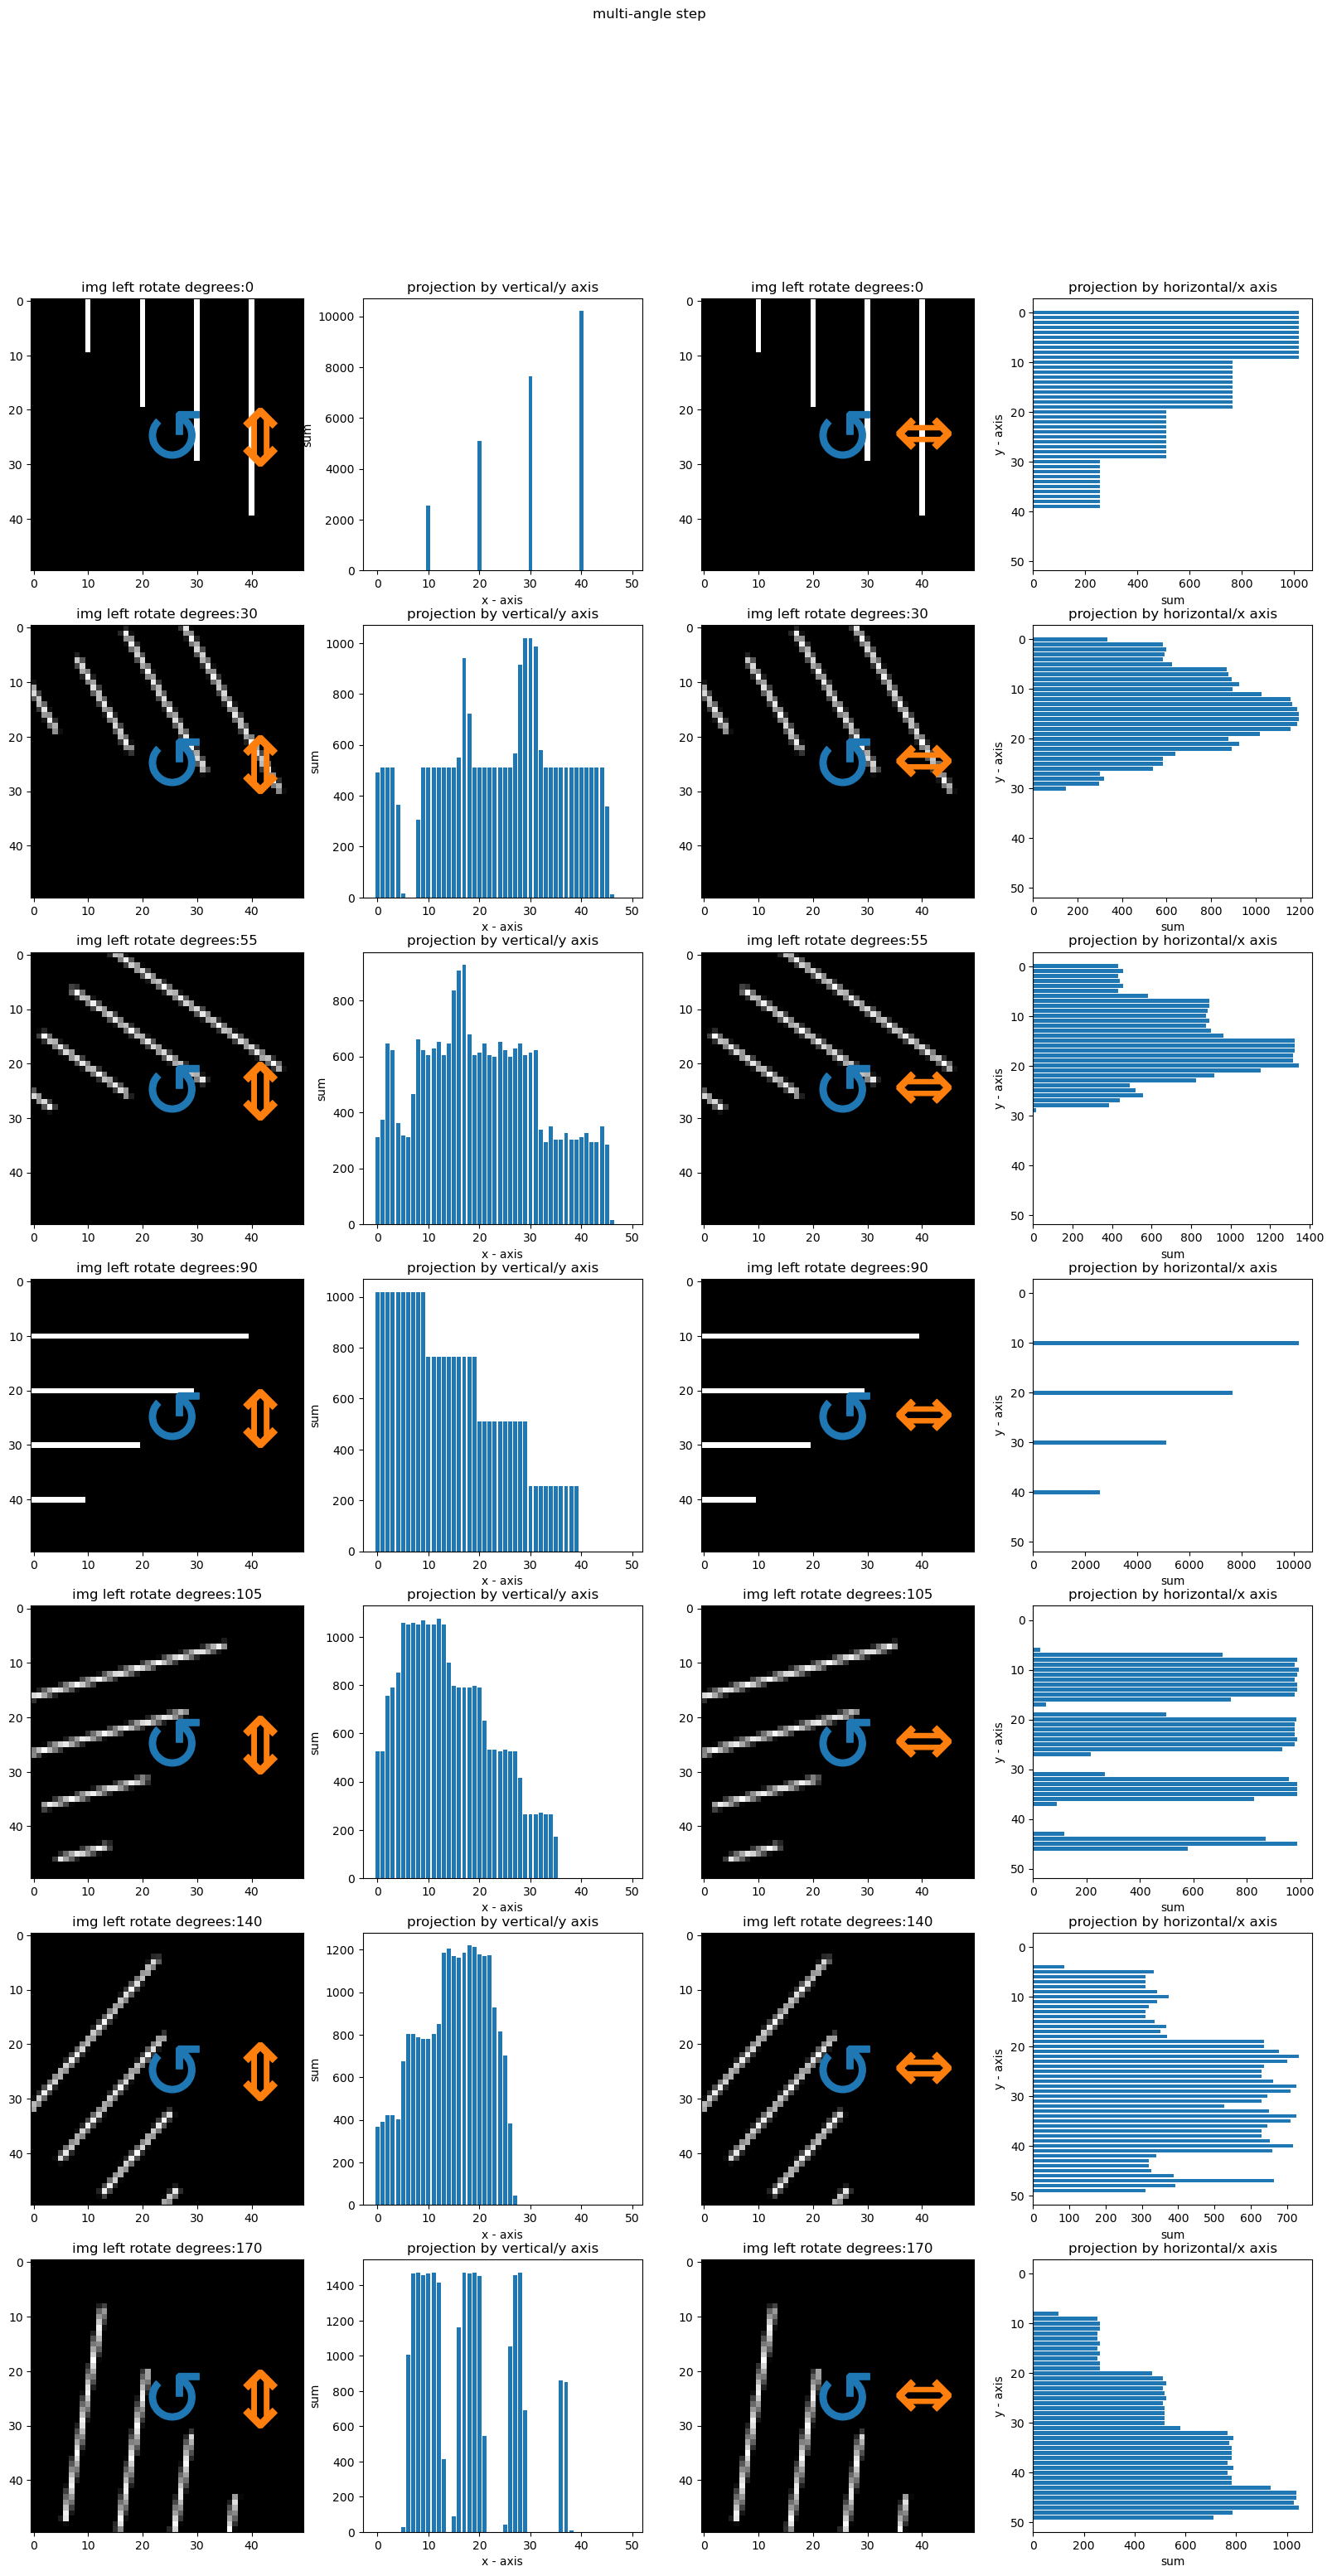

In [57]:
img = np.zeros((50, 50))

img[0:10, 10] = 255
img[0:20, 20] = 255
img[0:30, 30] = 255
img[0:40, 40] = 255
draw_step(img)

## draw projection

In [58]:
def draw_projection(name, img):
    fig = plt.figure(figsize=(20, 5))
    fig.suptitle(name)
    gs = fig.add_gridspec(1, 4)

    # draw img
    ax = fig.add_subplot(gs[0, 0])
    ax.set_title(f"img")
    ax.imshow(img, cmap="gray")
    ax.plot(25, 25, marker=r'$\circlearrowleft$', ms=50)
    ax.plot(40, 25, marker=r'$\Updownarrow$', ms=50)

    ax = fig.add_subplot(gs[0, 2])
    ax.set_title(f"img")
    ax.imshow(img, cmap="gray")
    ax.plot(25, 25, marker=r'$\circlearrowleft$', ms=50)
    ax.plot(40, 25, marker=r'$\Leftrightarrow$', ms=50)

    # get vertical projection space of 0-180 degrees
    angle = 180
    width = img.shape[1]
    space = np.zeros((angle, width))
    for deg in range(angle):
        img_rotated = rotate(img, deg)
        projection_vertical = projection(img_rotated, vert=True)

        space[deg] = projection_vertical

    # draw projection space
    ax = fig.add_subplot(gs[0, 1])
    ax.set_title(f"projection")
    ax.set_xlabel("x axis")
    ax.set_xlim(0, width)
    ax.set_ylabel("degrees")
    ax.set_ylim(180, 0)
    ax.imshow(space, cmap="gray", aspect='auto')

    # get vertical projection space of 0-180 degrees
    angle = 180
    higth = img.shape[0]
    space = np.zeros((angle, higth))
    for deg in range(angle):
        img_rotated = rotate(img, deg)
        projection_vertical = projection(img_rotated, vert=False)

        space[deg] = projection_vertical

    # draw projection space
    ax = fig.add_subplot(gs[0, 3])
    ax.set_title(f"projection")
    ax.set_xlabel("degrees")
    ax.set_xlim(0, 180)
    ax.set_ylabel("y axis")
    ax.set_ylim(higth, 0)
    ax.imshow(space.T, cmap="gray", aspect='auto')

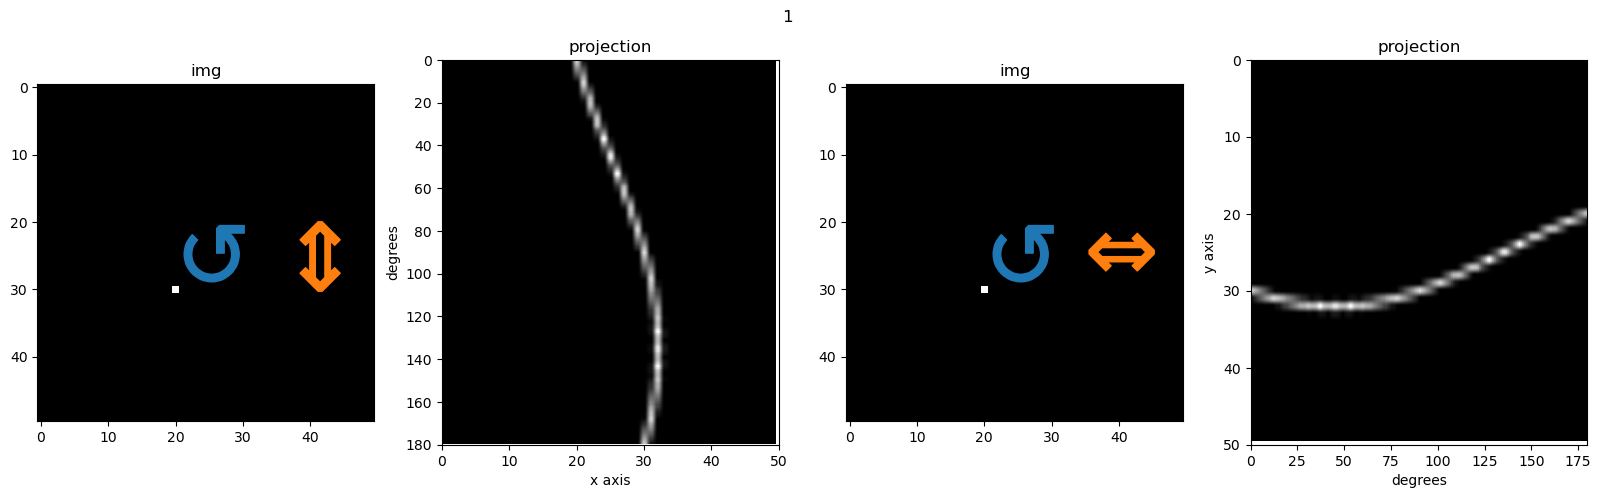

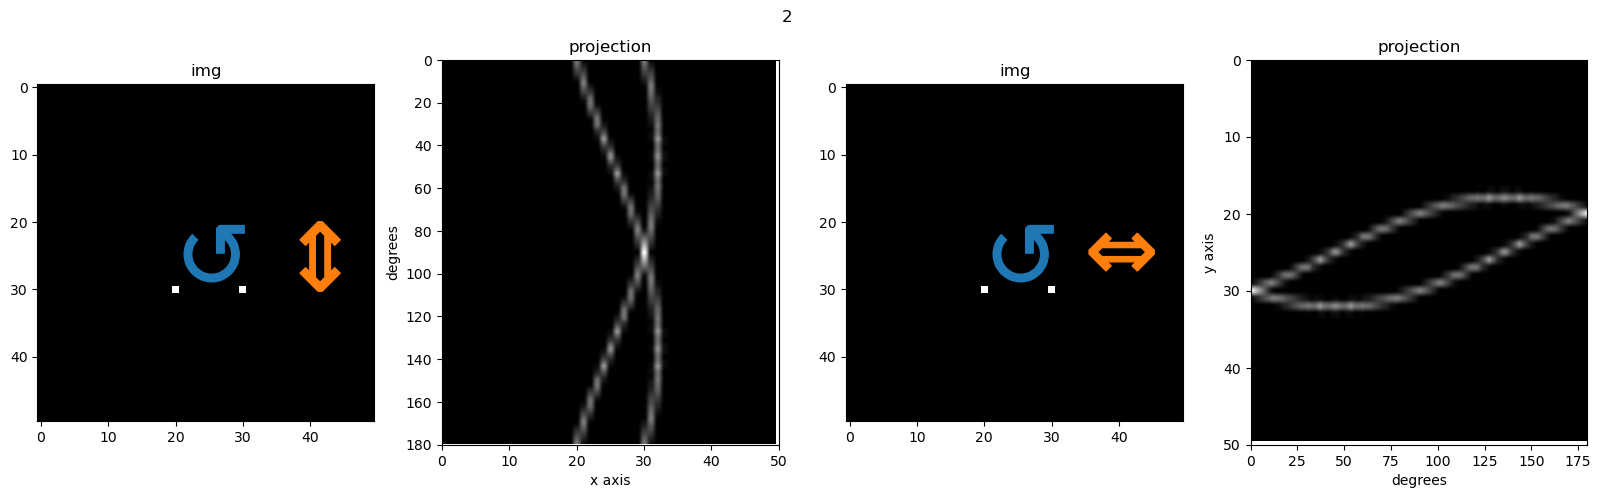

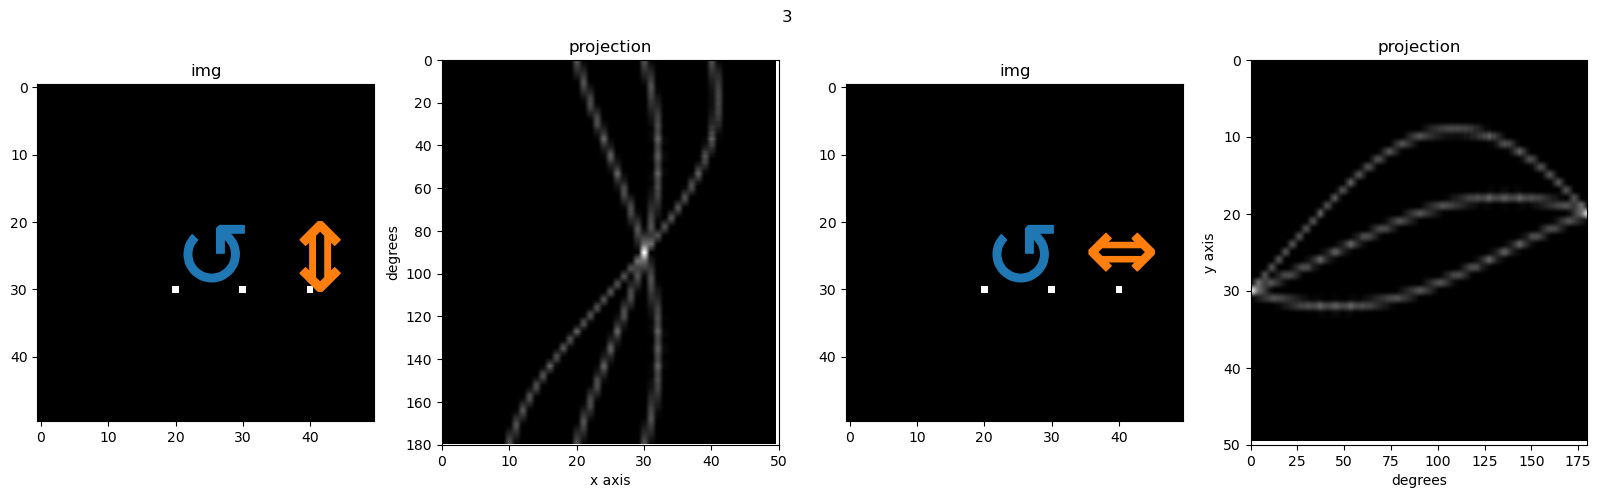

In [59]:
# image with empty
img = np.zeros((50, 50))

# image with one point
img[30][20] = 255
draw_projection("1", img)

# image with two points
img[30][30] = 255
draw_projection("2", img)

# image with three points
img[30][40] = 255
draw_projection("3", img)


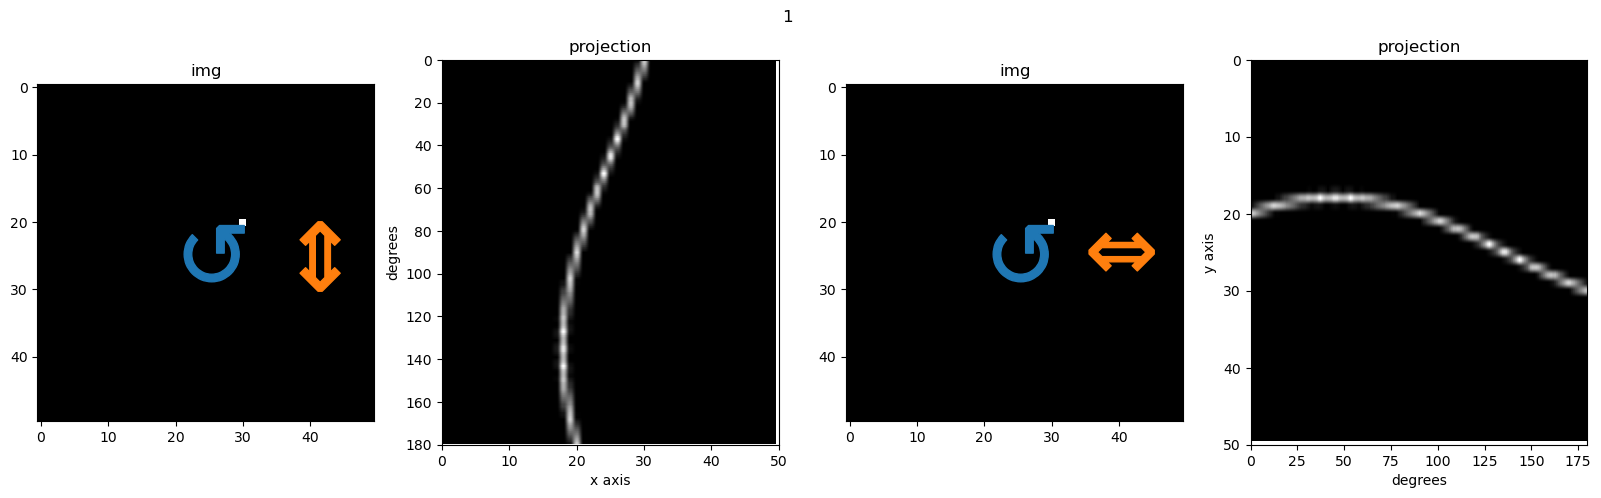

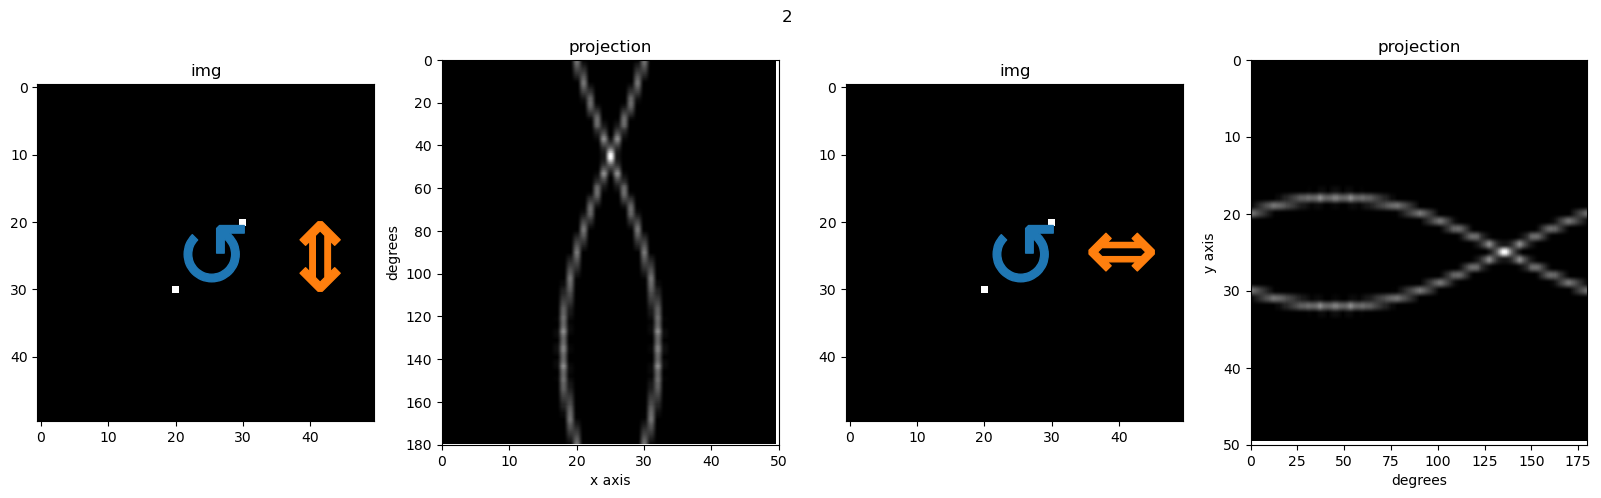

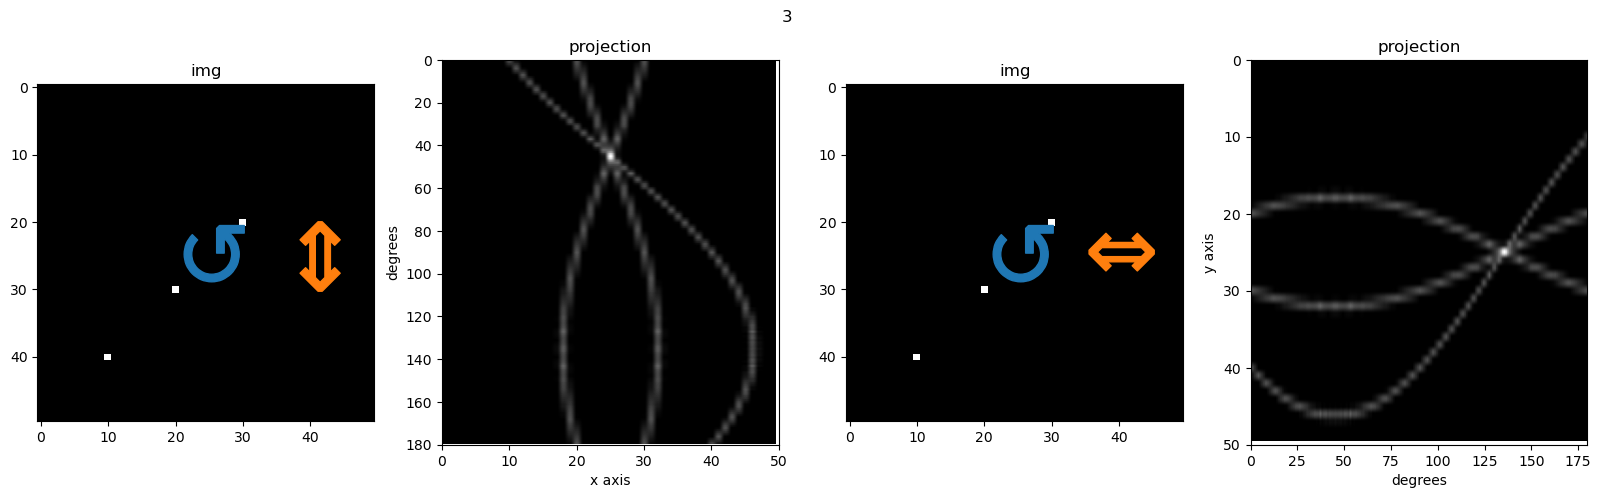

In [60]:
# image with empty
img = np.zeros((50, 50))

# image with one point
img[20][30] = 255
draw_projection("1", img)

# image with two points
img[30][20] = 255
draw_projection("2", img)

# image with three points
img[40][10] = 255
draw_projection("3", img)

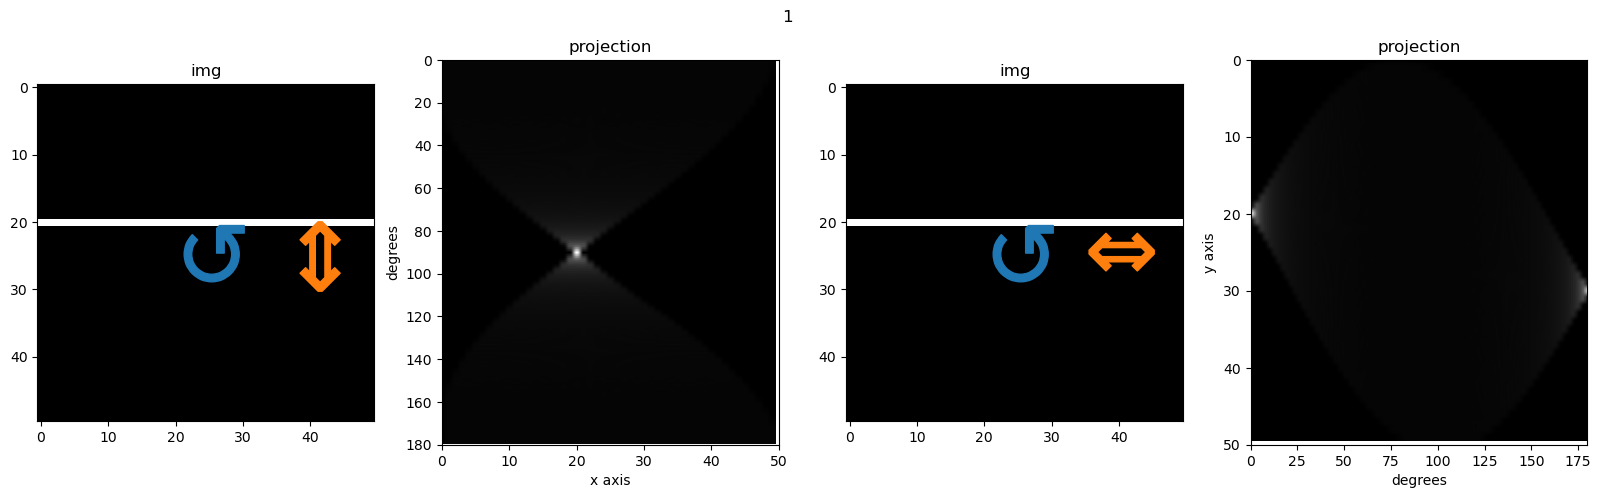

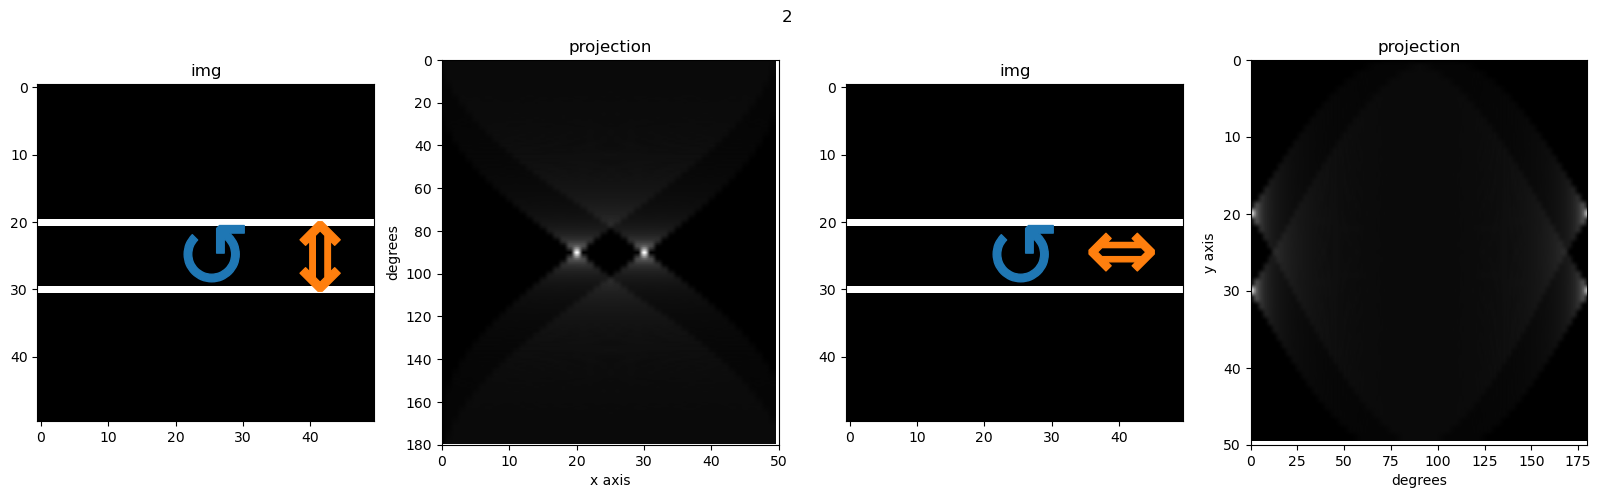

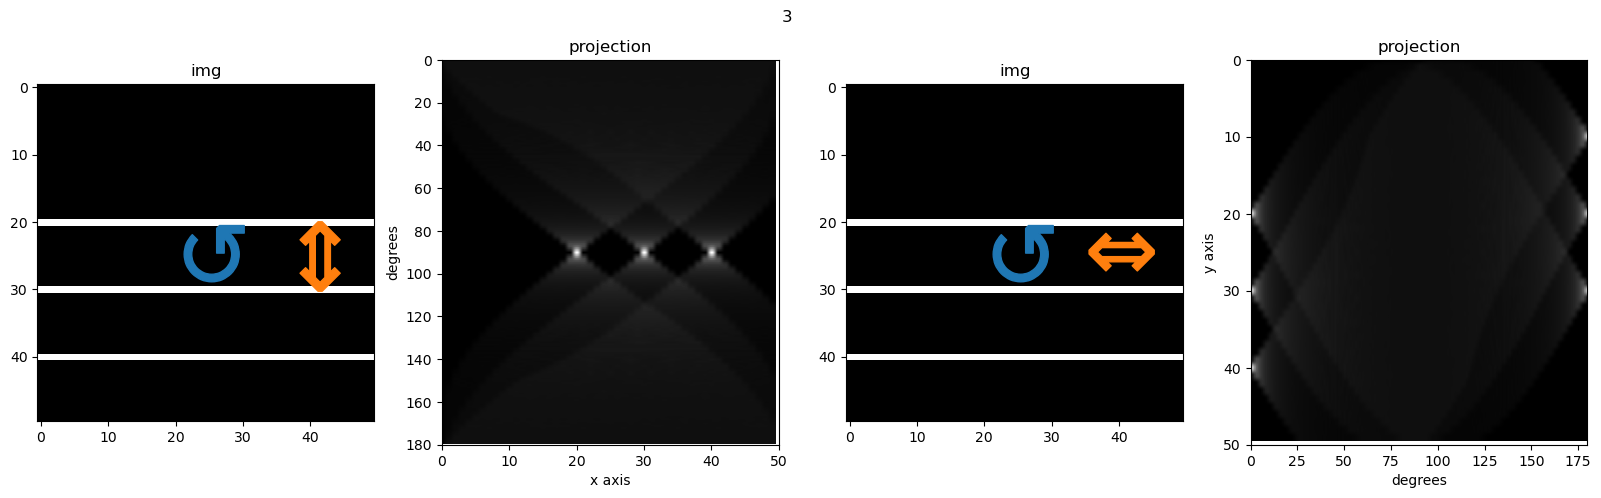

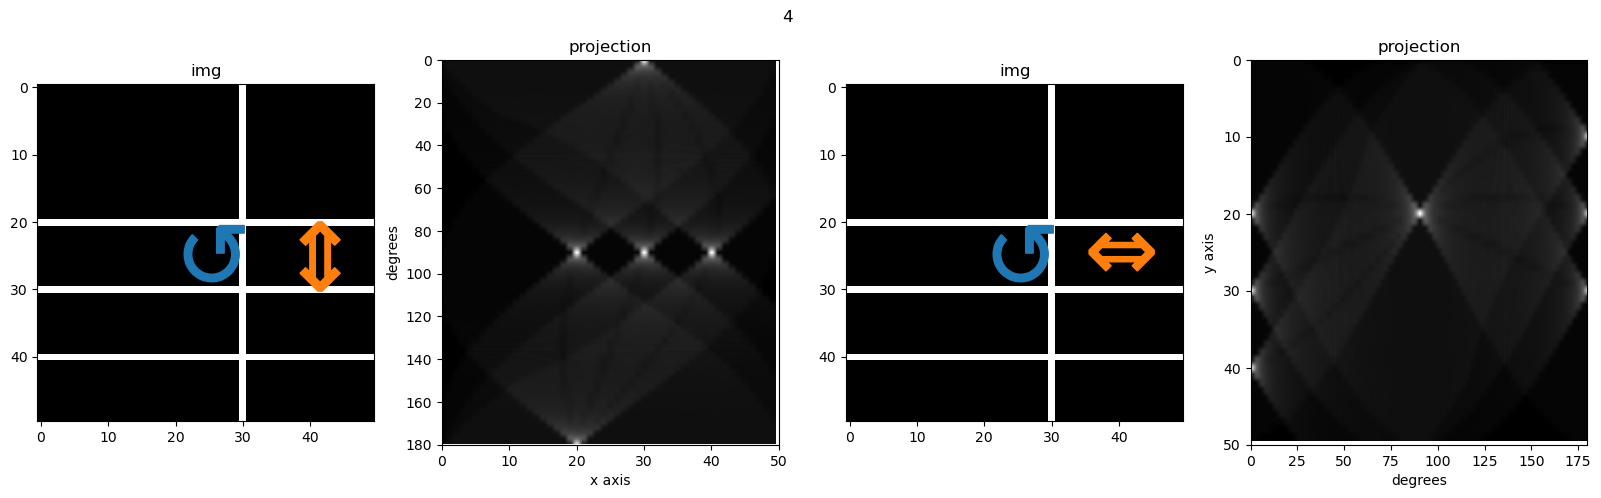

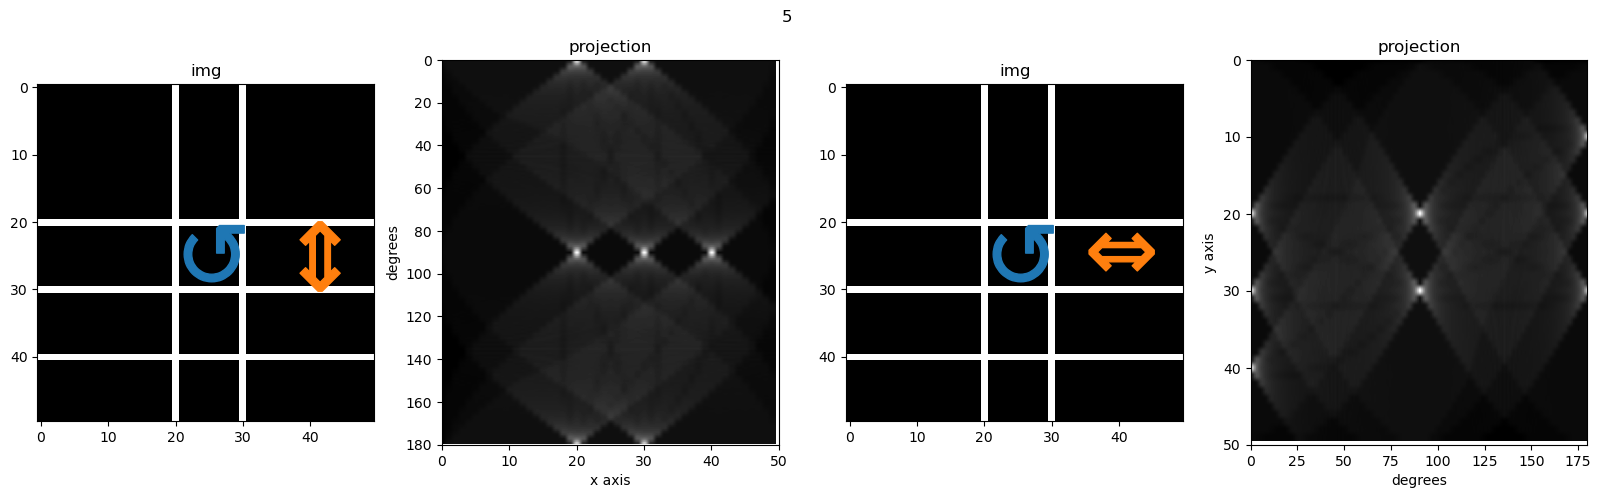

In [61]:
# image with empty
img = np.zeros((50, 50))

# image with one line
img[20] = 255
draw_projection("1", img)

# image with two lines
img[30] = 255
draw_projection("2", img)

# image with three lines
img[40] = 255
draw_projection("3", img)

# image with 4 lines
img[:, 30] = 255
draw_projection("4", img)

# image with 5 lines
img[:, 20] = 255
draw_projection("5", img)

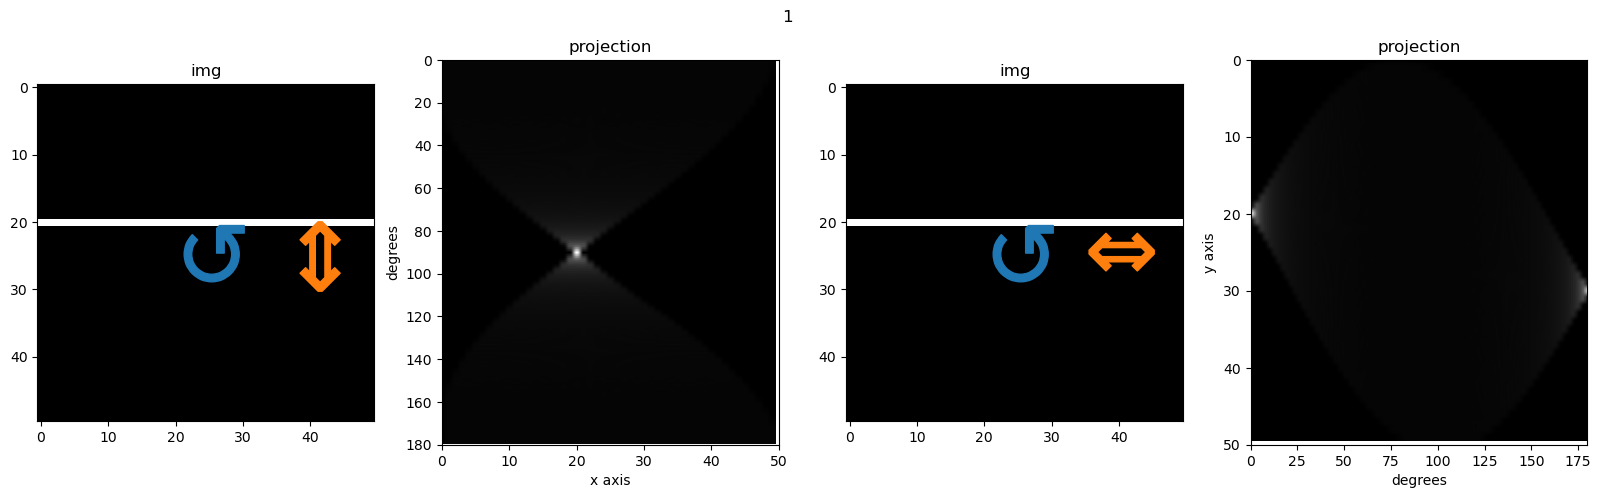

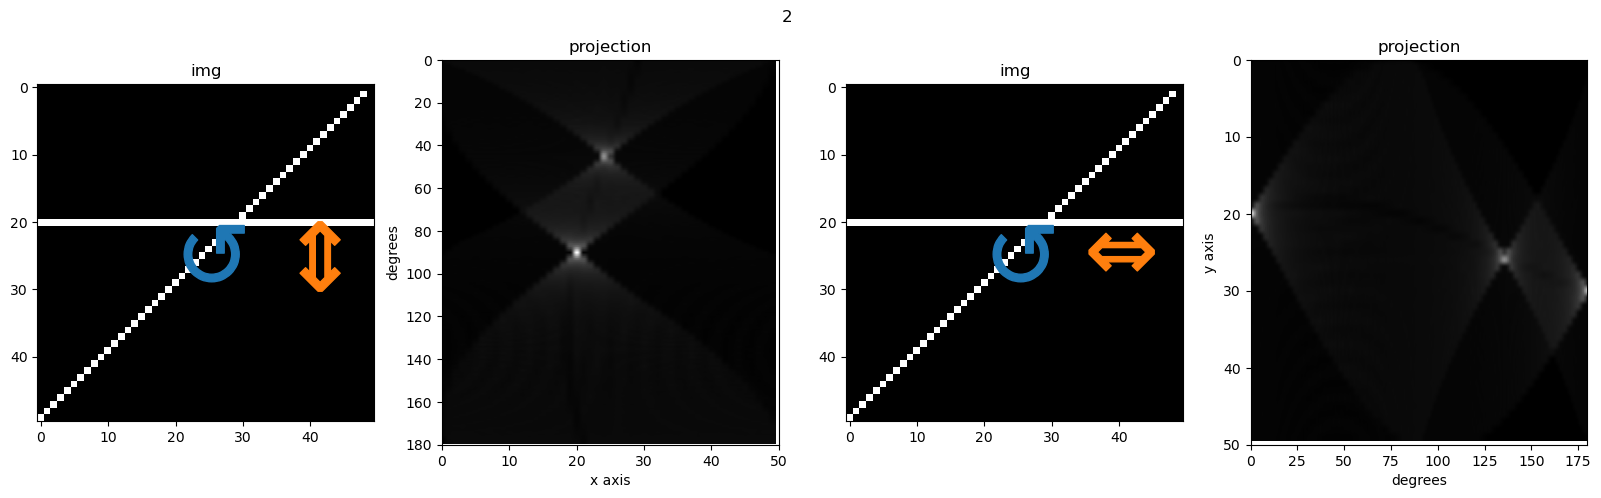

In [62]:
# image with empty
img = np.zeros((50, 50))

# image with one line
img[20] = 255
draw_projection("1", img)

# image with two lines
for i in range(49):
    x = i
    y = -x + 49
    img[y, x] = 255
draw_projection("2", img)